## Clasificadores de Máximo Margen

### Competencias
- Comprender el principio de la maximización del margen como un clasificador. 
### Introducción
Las Máquinas de Soporte Vectorial (de aquí en adelante SVM, Support Vector Machines) son
modelos con una amplia versatilidad para manejar tareas de clasificación y regresión en
casos lineales y no lineales. Una de las principales bondades de SVM es su rápida
implementación y buenos resultados predictivos, situándose entre las mejores técnicas
junto a las redes neuronales, ensambles, sistemas de votación y gradient boosting
(elementos que veremos posteriormente). Para entender el comportamiento de SVM,
Murphy (2012) recalca que es una mezcla entre las técnicas kernel trick, sparsity y large
margin principle. Cada una de éstas mantiene tanto sesgo como varianza controlado en
niveles aceptables.

### El caso separable: Clasificadores de Máximo Margen
Para motivar el uso de SVM, necesitamos estudiar el principio del máximo margen. Éste
surge de la incapacidad de los modelos logísticos de encontrar una frontera de decisión
donde los atributos son linealmente separables. La figura izquierda generada con
afx.setup_svm_problem() demuestra este problema. La figura presenta una serie de
clasificadores lineales, que representan funciones de decisión candidatas para generar una
separación eficiente. Lamentablemente algunos de los candidatos clasificadores tienden a
acercarse a los atributos en algún rango, lo que imposibilita generar un clasificador óptimo.

SVM ocupa el principio de máximo margen para encontrar un clasificador lineal óptimo. Este
se visualiza en la figura derecha de afx.setup_svm_problem(). La obtención del
clasificador lineal para este caso implica **`maximizar`** el margen en la distancia entre las dos
nubes de datos. Para ello, el algoritmo se vale de los vectores de soporte (encapsulados en
un círculo) que establecerán el ancho del margen, en función al candidato lineal β𝑇 + β0 = 0.

**`El principio del máximo margen es bastante intuitivo:`** Si un clasificador tiene una frontera
de clasificación demasiado cerca de las instancias de las clases, muy probablemente
cuando se agreguen nuevas instancias de datos, algunas de estas caigan del otro lado de la
frontera que les corresponde haciendo el clasificador inutil. Por otro lado, si maximizamos la
distancia entre las clases y la frontera (el margen entre las clases), aunque se agreguen más
datos estos rara vez se deberían desviar demasiado de los datos ya vistos. Por lo tanto,
probablemente estarán dentro de las fronteras correspondientes.

In [6]:
import warnings
import matplotlib.pyplot as plt
import lec5_graphs as afx
from matplotlib.gridspec import GridSpec
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(10, 10)
warnings.filterwarnings('ignore')

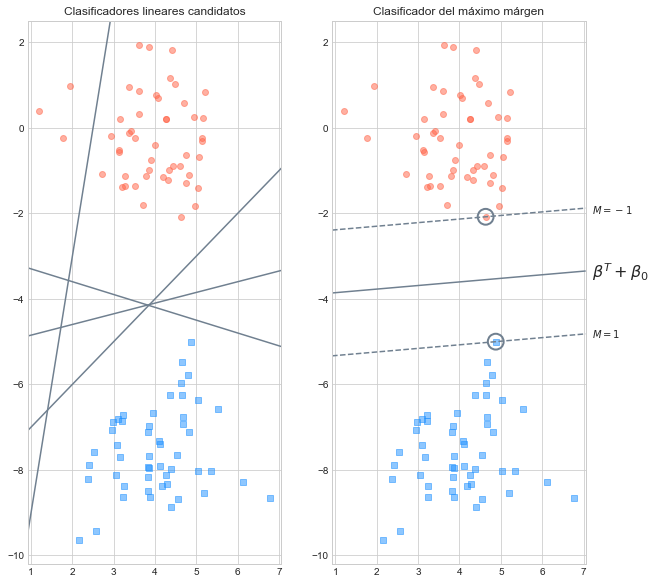

In [7]:
afx.setup_svm_problem()

### Digresión: Obtención del plano clasificador en el caso lineal separable

Si tenemos **`N`** observaciones en pares de forma $(x_1, y_2),...(x_n, y_n)$ donde $x_1 \in X^R$ e $y \in Y \to \{-1, 1\}$
se busca un hiperplano con la siguiente expresion:
$\{x:f(x) = X^T\beta + \beta_0 = 0\}$

A partir de este hiperplano buscamos una regla de clasificación $G(x) = sign[X\beta + \beta_0]$ donde **`G(x)`**  da la distancia de 𝑥 en el hiperplano.

Posterior a la obtención de éste candidato, buscamos maximizar la distancia del márgen
con la siguiente estrategia de optimización:

$$argmax M$$
$$\beta,\beta_0||\beta|| = 1$$
$$Subjeto a: y_i(X^T\beta + \beta_0)\geq M \hspace{20mm} \forall_i \in N$$

Donde **`M`** es el margen, en la figura de derecha afx.setup_svm_problem() el margen **`M`** es
la distancia entre cualquiera de las líneas punteadas y la línea central continua que
representa la frontera de clasificación.

Éste caso hipotético donde las clases son linealmente separables se conoce como
**`clasificación estricta de margen`**, dado que la optimización de la función dependerá
exclusivamente que dentro del margen no existan vectores. Otro aspecto a considerar es el
hecho que los clasificadores estrictos **`son sensibles a outliers`**, por lo que la obtención de
márgenes en una muestra de entrenamiento con outliers puede conllevar a fallas de
generalización del modelo. El principal problema de esta aproximación es que si las clases
no son linealmente separables el problema no tiene solución, es decir, nuestro modelo no es
capaz de encontrar ningún clasificador.

### Digresión: Estandarización de atributos
Para evitar la influencia de outliers en la muestra de entrenamiento, podemos preprocesar
los datos mediante StandardScaler. También existe la posibilidad de preprocesar los
atributos con alguna técnica de reducción de dimensiones como PCA, con la salvedad que
SVM hace uso de kernels para reexpresar la dimensionalidad de los datos. Implementar PCA
en algunos casos puede forzar linealidad, cosa que no deseamos. Posteriormente
hablaremos de los kernels.

El objetivo de SVM es generar un caso de **`clasificación flexible de margen`**, donde
permitimos encontrar una frontera de decisión optimizada que permita que algunos puntos
puedan posicionarse dentro del margen. Este caso da origen a la discusión de las máquinas
de soporte vectorial.